In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Function to download data
def download_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Function to calculate daily returns
def calculate_daily_returns(data):
    return data.pct_change().dropna()


In [4]:
# Function to calculate Sharpe Ratio
def sharpe_ratio(daily_returns, risk_free_rate=0.01):
    mean_return = daily_returns.mean()
    std_dev = daily_returns.std()
    return (mean_return - risk_free_rate) / std_dev

# Function to calculate Sortino Ratio
def sortino_ratio(daily_returns, risk_free_rate=0.01):
    mean_return = daily_returns.mean()
    negative_return_std_dev = daily_returns[daily_returns < 0].std()
    return (mean_return - risk_free_rate) / negative_return_std_dev


In [5]:
# Function to calculate cumulative returns
def cumulative_returns(data):
    return (data / data.iloc[0]) - 1


In [6]:
# Function to calculate moving average
def moving_average(data, window):
    return data.rolling(window=window).mean()

# Function to analyze lead-lag relationship and correlation between two indices
def lead_lag_analysis(index1, index2, window):
    index1_ma = moving_average(index1, window)
    index2_ma = moving_average(index2, window)
    
    plt.figure(figsize=(14, 7))
    plt.plot(index1_ma, label=f'{index1.name} Moving Average')
    plt.plot(index2_ma, label=f'{index2.name} Moving Average')
    plt.legend()
    plt.title('Lead-Lag Analysis')
    plt.show()
    
    correlation = index1_ma.corr(index2_ma)
    print(f'Correlation between {index1.name} and {index2.name} (moving average): {correlation}')
    
    return correlation


In [7]:
# Define the equities and indices
equities = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
indices = ['^GSPC', '^DJI', '^IXIC', '^FTSE', '^N225']


In [8]:
# Download data
start_date = '2020-01-01'
end_date = '2023-01-01'

equity_data = download_data(equities, start_date, end_date)
index_data = download_data(indices, start_date, end_date)


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [9]:
# Calculate daily returns
equity_returns = calculate_daily_returns(equity_data)
index_returns = calculate_daily_returns(index_data)


In [10]:
# Calculate Sharpe and Sortino Ratios for equities
print("Sharpe Ratios for Equities:")
for ticker in equities:
    sr = sharpe_ratio(equity_returns[ticker])
    print(f'{ticker}: {sr}')

print("\nSortino Ratios for Equities:")
for ticker in equities:
    sr = sortino_ratio(equity_returns[ticker])
    print(f'{ticker}: {sr}')


Sharpe Ratios for Equities:
AAPL: -0.3858083352320669
MSFT: -0.41981575082209194
GOOGL: -0.4334679855299381
AMZN: -0.40042877282295347
TSLA: -0.15471297656780056

Sortino Ratios for Equities:
AAPL: -0.5598438970208733
MSFT: -0.5846220617860918
GOOGL: -0.6089680802354729
AMZN: -0.5829709858909553
TSLA: -0.22743253974207925


In [11]:
# Calculate Sharpe and Sortino Ratios for indices
print("\nSharpe Ratios for Indices:")
for ticker in indices:
    sr = sharpe_ratio(index_returns[ticker])
    print(f'{ticker}: {sr}')

print("\nSortino Ratios for Indices:")
for ticker in indices:
    sr = sortino_ratio(index_returns[ticker])
    print(f'{ticker}: {sr}')



Sharpe Ratios for Indices:
^GSPC: -0.6113542502888757
^DJI: -0.6207390157338182
^IXIC: -0.5268398129715202
^FTSE: -0.7714399814382297
^N225: -0.7320537223961013

Sortino Ratios for Indices:
^GSPC: -0.746804494229307
^DJI: -0.7288323009445288
^IXIC: -0.6771327035776661
^FTSE: -0.8926470626306152
^N225: -1.0644325621306547


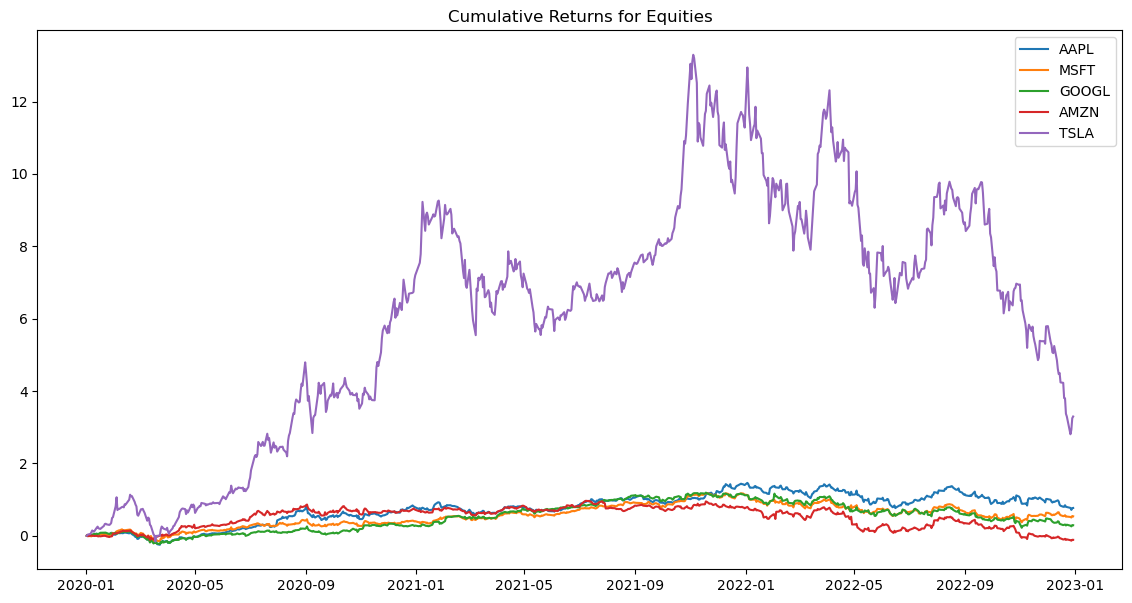

In [12]:
# Calculate cumulative returns
equity_cumulative_returns = cumulative_returns(equity_data)

# Plot cumulative returns
plt.figure(figsize=(14, 7))
for ticker in equities:
    plt.plot(equity_cumulative_returns[ticker], label=ticker)
plt.title('Cumulative Returns for Equities')
plt.legend()
plt.show()


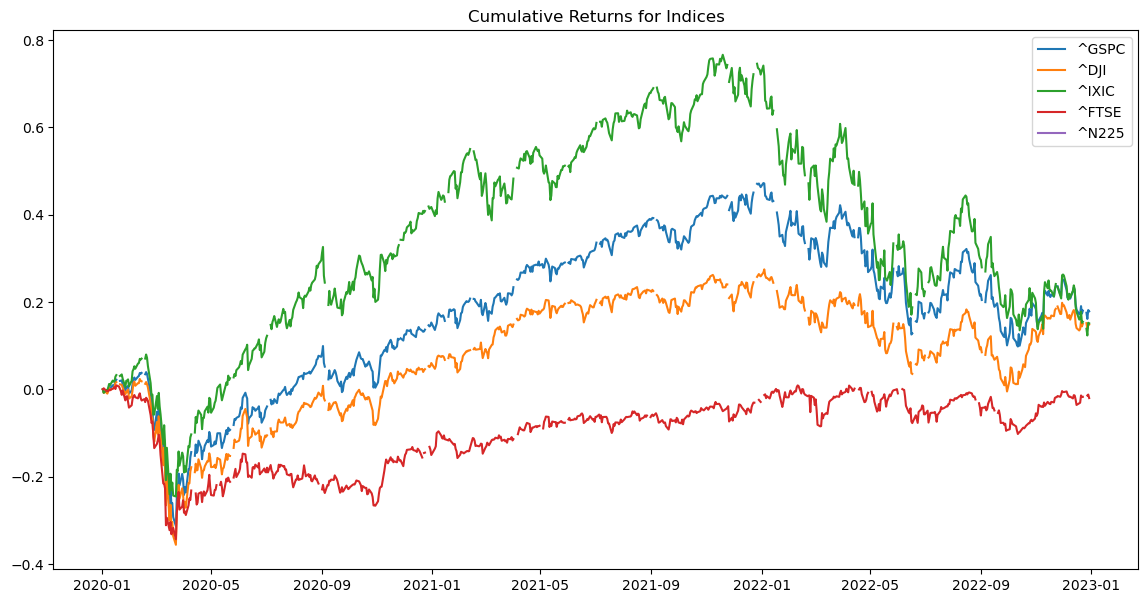

In [13]:
# Calculate cumulative returns
index_cumulative_returns = cumulative_returns(index_data)

# Plot cumulative returns
plt.figure(figsize=(14, 7))
for ticker in indices:
    plt.plot(index_cumulative_returns[ticker], label=ticker)
plt.title('Cumulative Returns for Indices')
plt.legend()
plt.show()


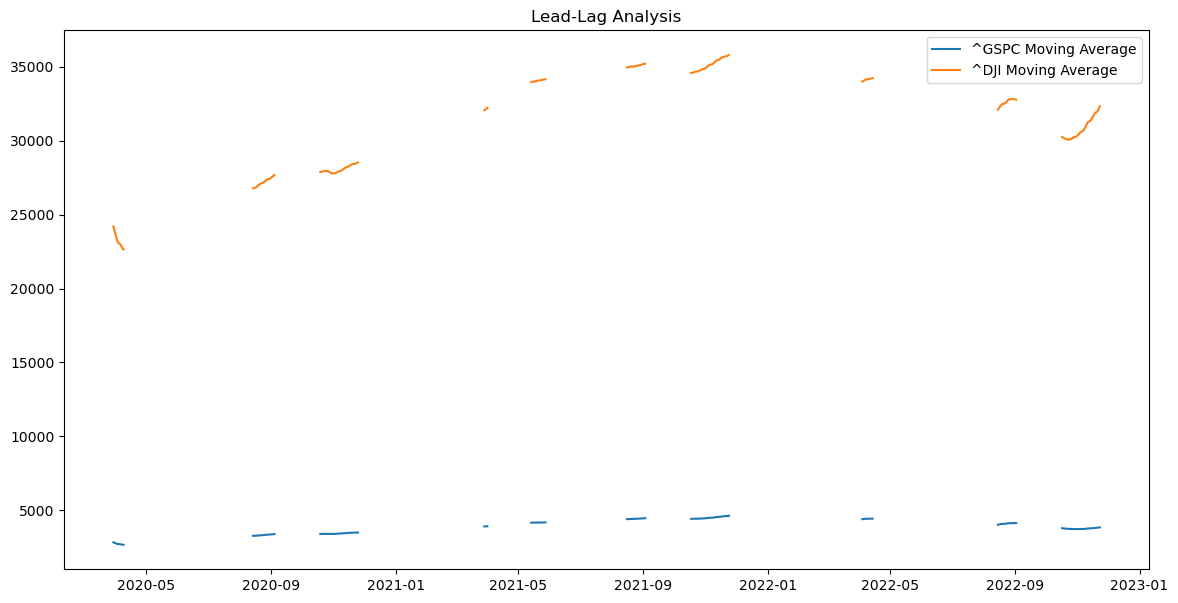

Correlation between ^GSPC and ^DJI (moving average): 0.9917533221565711
Correlation between ^GSPC and ^DJI: 0.9917533221565711


In [14]:
# Lead-Lag Analysis
window = 30
index1 = index_data['^GSPC']
index2 = index_data['^DJI']

correlation = lead_lag_analysis(index1, index2, window)
print(f'Correlation between ^GSPC and ^DJI: {correlation}')
